# Trabalho de Termodinâmica Aplicada: 
### Cálculos de propriedades termodinâmicas e de equilíbrio de fases utilizando equações de estado e modelos de G de excesso

##### Adriana Teixeira
##### TPQB - Doutorado
##### 2016/3

In [1]:
from scipy import optimize as opt

#### O objetivo deste trabalho é realizar cálculos de propriedades termodinâmicas para os componentes puros ÁGUA e ETANOL, considerando a Equação de Estado SRK, e em seguida realizar cálculos para a mistura destes compostos, utilizando o modelo NRTL de G de excesso. 

#### Para facilitar a execução, este trabalho foi dividido em três arquivos:
>* 1- Cálculos para o componente puro AGUA
>* 2- Cálculos para o componente puro ETANOL
>* 3- Cálculos para o sistema binário AGUA + ETANOL

### *3) Cálculos para o sistema binário AGUA + ETANOL

O primeiro passo é avaliar o sistema pela Regra das fases de Gibbs, para conhecer os graus de liberdade permitidos. Assim, para dois componentes, em equilíbrio L-V:  

Variância = C − F + 2 = 2 - 2 + 2  = 2

Entao são necessárias 2 variáveis independentes para caracterizar o sistema. 

#### *A) Equilíbrio líquido-vapor de misturas*


Há duas opções para o cálculo de propriedades de misturas: 
>* usar EoS direto para as duas fases
>* usar propriedades em excesso para a fase líquida

Como não há bons modelos de Cp, mede-se Cp do componente puro com a pressão indo a zero (gas ideal) - Cpi' (T). Assim, para calcular o Cp de uma mistura como gas ideal (Cp'), como os componentes não se enxergam, temos que Cp'=somatorio(xi.Cpi'). Ainda assim, o fato de não termos modelos de Cp pode nos deixar em dúvida se a Equação de Estado, que é ótima para calcular propriedades PVT de fases gasosas, continua sendo boa para calcular propriedades de fases líquidas e sólidas. 

No caso de fases líquidas é comum utilizar as chamadas propriedades em excesso, e modelos de G de excesso. Estes modelos consideram a não-idealidade da fase líquida ao incluir o coeficiente de atividade dos componentes presentes na fase. 

##### Equilibrio de fases

Na condição de equilíbrio há igualdade de potenciais quimicos (e de fugacidade) de cada componente em cada fase, nas mesmas condições de P e T. A fugacidade de cada componente nas fases líquido e vapor pode ser expressa de diferentes maneiras:

>* ${f(i)}^{\mathrm{(v)}}(T,P,y) = {y(i)}.FI(i)^{\mathrm{(v)}}(T,P,y).P$      (FI é o coeficiente de fugacidade)
>* ${f(i)}^{\mathrm{(l)}}(T,P,x) = {x(i)}.FI(i)^{\mathrm{(l)}}(T,P,x).P$      (usando EoS para fase l)
>* ${f(i)}^{\mathrm{(l)}}(T,P,x) = {x(i)}{Gamma(i)}(T,x){P(i)}^{\mathrm{sat}}{FI(i)}^{\mathrm{sat}}.{correcao de Point}$  (usando modelos Gexcesso para a fase líquida)


Assim, para a igualdade de fugacidades no equilíbrio pode-se fazer duas considerações: 
>* *Usar EoS para as duas fases:*
>* ${y(i)}.FI(i)^{\mathrm{(v)}}(T,P,y) = {x(i)}.FI(i)^{\mathrm{(l)}}(T,P,x)$
>*
>* *Usar modelos de Gexcesso para a fase L:*
>* ${y(i)}.FI(i)^{\mathrm{(v)}}(T,P,y) = {x(i)}{Gamma(i)}(T,x){P(i)}^{\mathrm{sat}}{FI(i)}^{\mathrm{sat}}.{correcao de Point}$


Seguindo a equação que considera um modelo de Gexcesso para a fase líquida, pode-se fazer duas simplificações :
>* considerar mistura ideal na fase gasosa (assim a fugacidade é igual à pressão parcial de i):
${y(i)}{P} = {x(i)}{Gamma(i)}{P(i)}^{\mathrm{sat}}$  (Lei de Raoult modificada). Esta simplificação pode ser feita pois o termo ${FI(i)}^{\mathrm{sat}}.{correcao de Point}$ pode ser aproximado para um, pois os efeitos se compensam. 

>* considerar mistura ideal na fase líquida:
${y(i)}{P} = {x(i)}{P(i)}^{\mathrm{sat}}$  (Lei de Raoult) Na mistura ideal o coeficiente de atividade é igual a 1. 

Neste trabalho será utilizada a Lei de Raoult modificada:

${y(i)}{P} = {x(i)}{Gamma(i)}{P(i)}^{\mathrm{sat}}$ 

Para realizar os cálculos anteriores é necessário conhecer as pressões de saturação dos componentes da mistura. Este cálculo será feito pela Equação de Antoine, para tentar ter alguma precisão experimental e não considerar a equação de estado.E também por este motivo utilizaremos um modelo de G de excesso.

## Cálculo de ${P}^{\mathrm{ sat}}$ pela Equação de Antoine

In [2]:
# Definição de Psat(T,Componente)
# Fonte DDBST

def P_antoine(T,comp):
    
    A=0
    B=0
    C=0
    
    if comp == 1: # Água
        if T<(1+273.15):
            return 0
    
        elif T<(100+273.15):
            A = 8.07131
            B = 1730.63
            C = 233.426
            
        elif T<(374+273.15):
            A = 8.14019
            B = 1810.94
            C = 244.485
        
        else:
            return 0
       
    elif comp == 2: #Etanol
        if T<(-57+273.15):
            return 0
    
        elif T<=(80+273.15):
            A = 8.20417
            B = 1642.89
            C = 230.3
            
        elif T<=(243+273.15):
            A = 7.68117
            B = 1332.04
            C = 199.2
        
        elif T == 5.1635e2:
            return 6.3e6
        
        else:
            return 0
    
    elif comp ==3: #Hexano
        
        if T < (-95+273.15):
            return 0 #no correlation available
        
        elif T <= (235+273.15):
            A=7.01051
            B=1246.33
            C=232.988
               
        else:
            return 0
       
    return 10**(A - B/(C+T-273.15))*101325/760 # T em Kelvin e P convertido para Pascal

Conhecendo-se as pressões de saturação, pode-se seguir para o cálculo de Gama da mistura, pois vamos considerar que não podemos utilizar equações de estado para a fase líquida. 


## Modelo NRTL (Non Random Two Liquids) para Energia de Gibbs em Excesso ${G}^{\mathrm{ E}}$

O modelo de G de excesso escolhido neste trabalho é o modelo NRTL, descrito a seguir.

$$ \frac{g^E}{RT}=\sum_{i=1}^n \left[ x_i\frac{\sum_{j=1}^n \left[ \tau_{j,i} G_{j,i} x_{j} \right] }{\sum_{k=1}^n \left[ G_{k,i} x_k \right] } \right] $$

Onde:

$\tau_{i,j}= \frac{g_{i,j}-g_{j,j}}{RT}=\frac{A_{i,j}}{T}$

$G_{i,j}=\mathrm{exp}(-\alpha_{i,j} \tau_{i,j})$

Cada diferença $(g_{i,j}-g_{j,j})$ (em unidades de energia) e cada parametro de interação binaria  $A_{i,j}$ (em unidades de temperatura) são ajustados experimentalmente. 

Os coeficientes de atividade são calculados a partir derivação da expressão acima em relação ao numero de moles de cada componente i, mantendo constantes T, P e os demais componentes. 

 $$ln(\gamma_i)= \frac{\sum_{j=1}^n\left[\tau_{j,i} G_{j,i} x_{j}\right]}{\sum_{k=1}^n\left[G_{k,i}x_{k}\right]} + \sum_{j=1}^n\left[ \left(\frac{\ G_{i,j} x_{j}}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]}\right) \left(\tau_{i,j}-\frac{\sum_{j=1}^n\left[\tau_{i,j} G_{i,j} x_{i}\right]}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]} \right) \right] $$

O trabalho original deste modelo é :
* Renon H., Prausnitz J. M., "Local Compositions in Thermodynamic Excess Functions for Liquid Mixtures", AIChE J., 14_1, S.135–144, 1968 [doi:10.1002/aic.690140124](https://doi.org/10.1002/aic.690140124)

Em um trabalho posterior os mesmos autores estimam os parâmetros necessários para o modelo, considerando o sistema água, etanol e acetato de etila. Os dados dos coeficientes de interação binária entre água e etanol foram utilizados neste trabalho.

* Renon, H., Prausnitz, J.M., "Estimation of parameters for the NRTL equation for excess Gibbs energies of strongly nonideal liquid mixtures." Industrial & Engineering Chemistry Process Design and Development 8.3 (1969): 413-419.
[DOI:10.1021/i260031a019]( https://doi.org/10.1021/i260031a019)


In [3]:
import numpy as np

# Temperatura e composições de teste

T = 293.15            #K
x = np.array([.5,.5]) #normalizado
R = 8.3144598     #J.mol^−1.K^−1


# 1 = Água
# 2 = Etanol

alpha12 = alpha21 = 0.3


# Parâmetros de interação binárias

A12 = 976/R*4.18 #K
A21 = 88/R*4.18  #K

In [4]:
# Matrix com os parâmetros A_i,j
# De acordo com o modelo os termos diagonais são nulos 
A = np.array([[0, A12],
             [A21, 0]])

# Matriz simétrica alpha
alpha = np.array([[0, alpha12],
                [alpha21, 0]])

print(alpha)

[[ 0.   0.3]
 [ 0.3  0. ]]


In [5]:
# Verificando as matrizes

# Desta maneira pode-se acessar facilmente seus termos 

print("i,j,alpha[i,j],A[i,j]")
for i in range(2):
    for j in range(2):
        print(i,j,alpha[i,j],A[i,j])
        
#or even use the whole matrix at once
print("")
print("alpha=")
print(alpha)
print("")
print("A=")
print(A)
print("")
# rather than typing each element individually
print("alpha12,alpha21")
print(alpha12,alpha21)
print("")
print("A12,A21")
print(A12,A21)

i,j,alpha[i,j],A[i,j]
(0, 0, 0.0, 0.0)
(0, 1, 0.29999999999999999, 490.6728877322854)
(1, 0, 0.29999999999999999, 44.240998074222453)
(1, 1, 0.0, 0.0)

alpha=
[[ 0.   0.3]
 [ 0.3  0. ]]

A=
[[   0.          490.67288773]
 [  44.24099807    0.        ]]

alpha12,alpha21
(0.3, 0.3)

A12,A21
(490.6728877322854, 44.24099807422245)


In [6]:
# Matriz Tau

tau=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        tau[j,i]=A[j,i]/T
print("tau=")
print(tau)

print("")

# Matriz G

G=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
print("G=")
print(G)

tau=
[[ 0.          1.6737946 ]
 [ 0.15091591  0.        ]]

G=
[[ 1.          0.60523505]
 [ 0.95573484  1.        ]]


In [7]:
# Definição de Gamma

def Gamma(T,x,alpha,A):

    tau=np.zeros([2,2]) # Água e Etanol
    for j in range(2):
        for i in range(2):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([2,2])
    for j in range(2):
        for i in range(2):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([2])
    for i in range(2):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(2):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(2):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

print(Gamma(T,x,alpha,A))

[ 1.53600055  1.31739026]


In [8]:
# Teste do cálculo de Psat por Antoine

print("P_sat 1 =",P_antoine(T,1),"Pa")
print("P_sat 2 =",P_antoine(T,2),"Pa")

('P_sat 1 =', 2329.5753519365844, 'Pa')
('P_sat 2 =', 5826.254353148996, 'Pa')


## Cálculo da Pressão de Bolha da mistura (${P}_{\mathrm{ bolha}}$)

In [9]:
# P_bolha = Somatório (x(i) * gamma(i)* P(i)_sat)

def P_bolha(T,x):
    
    P = np.zeros(2)
    
    for i in range (2): # 2 componentes
        
#        P = 0      
#        P = P + x[i]*Gamma(T,x,alpha,A)[i]*P_antoine(T,i+1)
#        print(d,P)

        P[i] = x[i]*Gamma(T,x,alpha,A)[i]*P_antoine(T,i+1) # Para i=0 -> Componente=1 | Para i=1 -> Componente=2)
#        print (i,P[i])
    
    return P[i]+P[i-1]

# Teste da função

T_teste = 293.15
x_teste = [.5,.5]

# Imprime dos valores para as condições de teste

print("x 1 =",x_teste[0])
print("x 2 =",x_teste[1])
print("")
print("Gamma 1 =",Gamma(T_teste,x_teste,alpha,A)[0])
print("Gamma 2 =",Gamma(T_teste,x_teste,alpha,A)[1])
print("")
print("P_sat 1 =",P_antoine(T_teste,1),"Pa")
print("P_sat 2 =",P_antoine(T_teste,2),"Pa")
print("")
print("P_bolha =",P_bolha(T_teste,x_teste),"Pa")

('x 1 =', 0.5)
('x 2 =', 0.5)

('Gamma 1 =', 1.5360005518378324)
('Gamma 2 =', 1.3173902639189194)

('P_sat 1 =', 2329.5753519365844, 'Pa')
('P_sat 2 =', 5826.254353148996, 'Pa')

('P_bolha =', 5626.8398930380581, 'Pa')


## Cálculo da curva de ELV da mistura (${P}_{\mathrm{ bolha}}$ e ${P}_{\mathrm{ orvalho}}$ )


In [10]:
# CÓDIGO MODIFICADO
# Temperatura

T_dado = 273.15+200 # Unidade K

grid_x1       = np.zeros(101)
grid_y1       = np.zeros(101)
grid_P_bolha  = np.zeros(101)

i = 0

for x1 in np.linspace(0,1,101):
    
    grid_x1[i]      = x1
    
    x2              = 1 - x1

    x_vetor         = [x1,x2]
    
    grid_P_bolha[i] = P_bolha(T_dado,x_vetor)
    
    grid_y1[i]      = x1*Gamma(T_dado,x_vetor,alpha,A)[0]*P_antoine(T_dado,1)/P_bolha(T_dado,x_vetor)  #Porvalho
    
#    print(i,x1,u[i],grid_P_bolha[i])
    
    i = i+1
    
#print(grid_x1,grid_P_bolha,grid_y1)




In [11]:
# Dados experimentais de ELV água-etanol (fração molar de água em cada fase)
# Referência: F. Barr-David, B.F. Dodge, J. Chem. Eng. Data 4 (1959) 107–121.

table = np.loadtxt('Etanol liquido 200 oC.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
grid_x1L_exp = 1-table[:,0]                # converter fração molar de etanol em fração molar de água
grid_Pbolha_exp = table[:,1]*6894.757     # converter psi para Pa

table = np.loadtxt('Etanol vapor 200 oC.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
grid_x1V_exp = 1-table[:,0]                # converter fração molar de etanol em fração molar de água
grid_Porvalho_exp = table[:,1]*6894.757     # converter psi para Pa



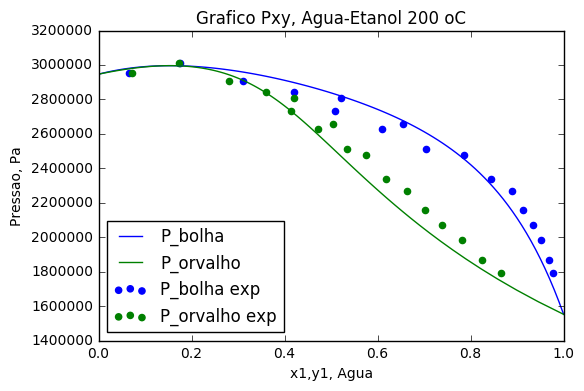

In [12]:
## Plotando o gráfico 

import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 1
plt.figure(1)

#legend=[] #iniciador do objeto legenda

#plt.subplot(121) #activate a subplot
plt.title('Grafico Pxy, Agua-Etanol 200 oC')
plt.xlabel('x1,y1, Agua')
plt.ylabel('Pressao, Pa')
plt.xlim([0,1])
#traçar

plt.plot(grid_x1,grid_P_bolha, label='P_bolha') #label é a etiqueta que será usada na legenda
plt.plot(grid_y1,grid_P_bolha, label='P_orvalho') 
plt.scatter(grid_x1L_exp,grid_Pbolha_exp, label='P_bolha exp',color='b') 
plt.scatter(grid_x1V_exp,grid_Porvalho_exp, label='P_orvalho exp',color='g') 

plt.legend(loc=0)

plt.show()

## Cálculo de Propriedades Termodinâmicas de Misturas

As propriedades termodinâmicas de fases líquidas são calculadas de maneira mais precisa através de propriedades que medem o seu afastamento de soluções ideais, e não de gases ideais. Assim:

${M^e} = M - {M^{id}}$

Nesta parte do trabalho serão calculadas as propriedades em excesso: entalpia, energia de Gibbs e entropia. Ao final será feita uma comparação com dados experimentais. 

Propriedade em excesso é a diferença entre o valor de uma propriedade para uma solução real e o valor da mesma propriedade para uma solução ideal, nas mesmas condições de T, P e x

$\frac{G^e}{RT} = \frac{H^e}{RT} - \frac{S^e}{R}$

ou

$\frac{G^e}{RT} = \sum{x(i)}.{ln Gamma(i)}$

Para P e x constantes: 

${H^e} = - {RT}{^2} \frac{d(G^e/RT)}{dT} $

${S^e} =\frac{dG^e}{dT} $


In [13]:
## Propriedades em Excesso


T_dado = 293.15 # Unidade K

u=np.zeros(101)
G_exc=np.zeros(101)

i = 0
for x1 in np.linspace(0,1,101):
        
    u[i] = x1
    x2 = 1 - x1
    x_vetor = [x1,x2]
    
    
    Gamma_vetor=Gamma(T_teste,x_vetor,alpha,A)
    
    Gamma1=Gamma_vetor[0]
    Gamma2=Gamma_vetor[1]

    G_exc[i]=(x1*np.log(Gamma1)+x2*np.log(Gamma2))*(R*T)
             
   
    i = i+1


print(G_exc)


[   0.           28.1815487    55.98377126   83.40314943  110.43610659
  137.07900659  163.32815256  189.17978569  214.63008394  239.67516078
  264.31106385  288.53377362  312.33920201  335.72319092  358.68151084
  381.20985932  403.30385943  424.95905821  446.17092503  466.93484997
  487.24614212  507.10002782  526.49164889  545.41606079  563.86823078
  581.84303592  599.33526117  616.3395973   632.85063884  648.86288192
  664.37072209  679.36845202  693.85025926  707.81022376  721.2423155
  734.14039195  746.49819547  758.30935067  769.56736169  780.26560937
  790.39734837  799.95570424  808.93367029  817.32410456  825.11972648
  832.31311364  838.8966983   844.86276396  850.20344163  854.9107062
  858.97637257  862.39209168  865.14934648  867.23944772  868.65352962
  869.38254546  869.417263    868.7482597   867.36591793  865.26041991
  862.42174254  858.8396521   854.50369869  849.40321063  843.52728854
  836.86479934  829.40437001  821.13438113  812.04296028  802.11797516
  791.34

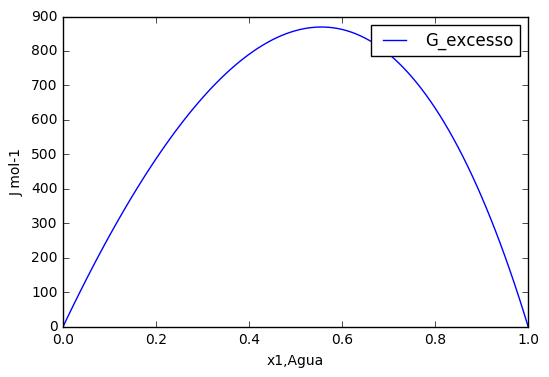

In [14]:
#plt.figure(1)

#legend=[] #iniciador do objeto legenda

plt.xlabel('x1,Agua')
plt.ylabel('J mol-1')


#traçar

plt.plot(u,G_exc, label='G_excesso') #label é a etiqueta que será usada na legenda

plt.legend(loc=1)

plt.show()

Agora, faltam calcular a ${H^e}$ e a ${S^e}$, e comparar tudo com dados experimentais. Por fim calcular deltaH e deltaS reais.